In [22]:
import pandas as pd

# Load data
dataset_path = r"C:\Users\Harsh\Downloads\prepared_adverts.csv"
df = pd.read_csv(dataset_path)



In [4]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('price', axis=1)  # Assuming 'price' is the target
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Convert categorical columns to 'category' data type
categorical_features = ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


In [9]:
from lightgbm import LGBMRegressor

# Initialize the LightGBM model with categorical feature handling
model = LGBMRegressor(random_state=42, categorical_feature='auto')

# Train the model
model.fit(X_train, y_train)


C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\basic.py:2034: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\basic.py:2054: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=auto, categorical_column=2,3,4,5,6,8,10 will be ignored. Current value: categorical_feature=auto
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 321339, number of used features: 12
[LightGBM] [Info] Start training from score 1.204683


LGBMRegressor(categorical_feature='auto', random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test)

# Evaluate the predictions
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error: 0.005784385389544318
R² Score: 0.9477379261168073


C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Setup the grid search
grid = GridSearchCV(LGBMRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 214226, number of used features: 12
[LightGBM] [Info] Start training from score 1.204664
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315

In [12]:
# Use the best model
best_model = grid.best_estimator_

# Make predictions and evaluate
best_predictions = best_model.predict(X_test)
best_rmse = mean_squared_error(y_test, best_predictions, squared=False)
best_r2 = r2_score(y_test, best_predictions)

print(f"Best Root Mean Squared Error: {best_rmse}")
print(f"Best R² Score: {best_r2}")


Best Root Mean Squared Error: 0.005517083498787762
Best R² Score: 0.9524564822201215


C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# Assume best_model is trained LightGBM model
predictions = best_model.predict(X_test)


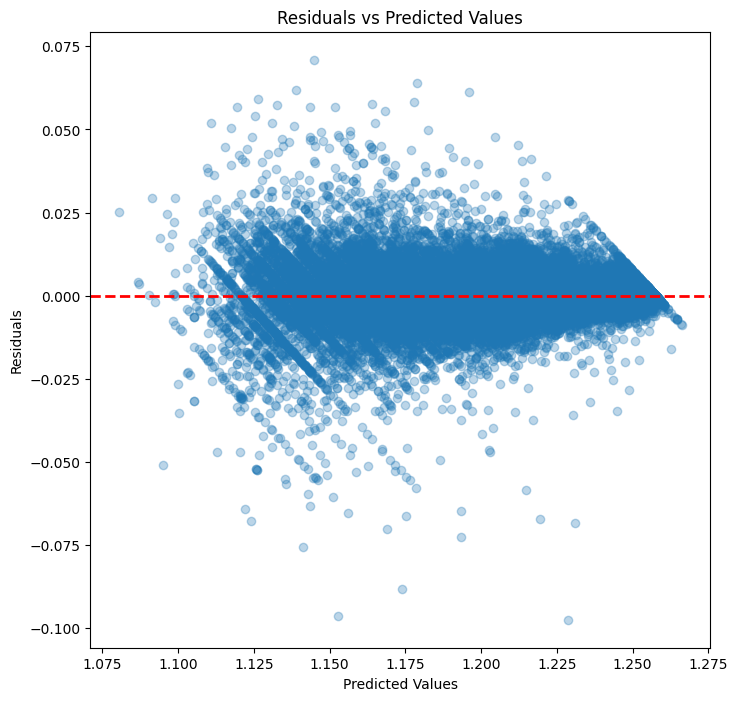

In [18]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 8))
plt.scatter(predictions, residuals, alpha=0.3)
plt.axhline(y=0, linestyle='--', color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


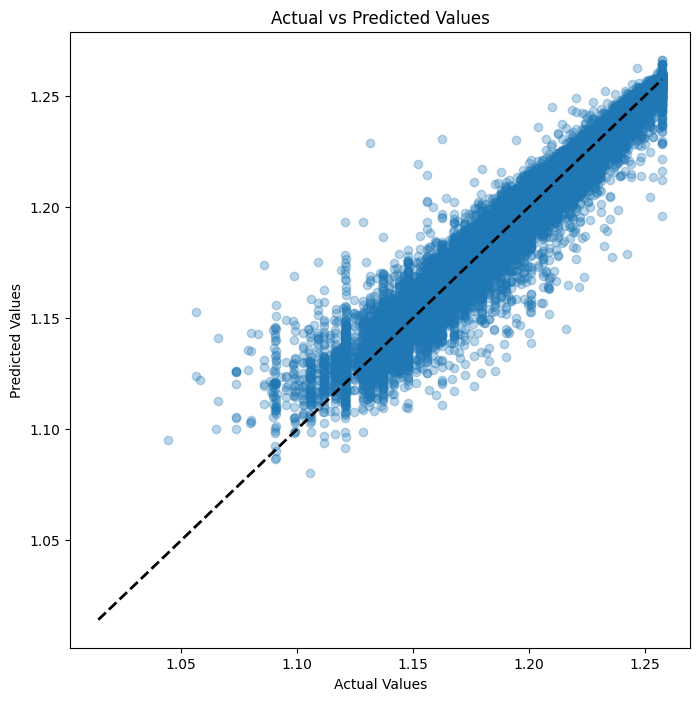

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


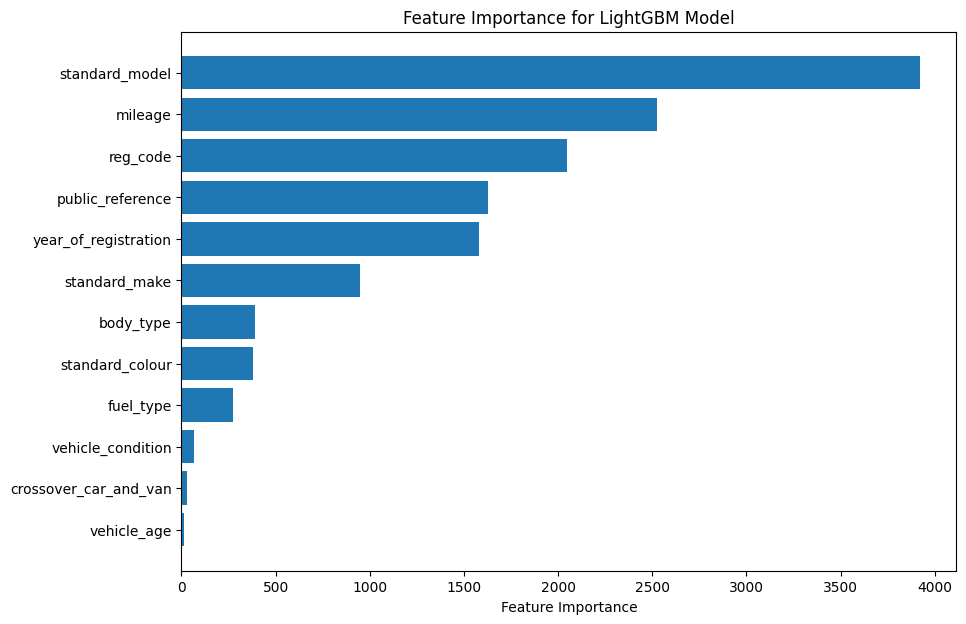

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for LightGBM Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()
